###목표
- 사전 로컬환경에서 만들어둔 npz파일을 불러와서 신경망에 넣어 예측, 학습해보자

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정/data/animals.npz')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 224, 224, 3), (240, 224, 224, 3), (960,), (240,))

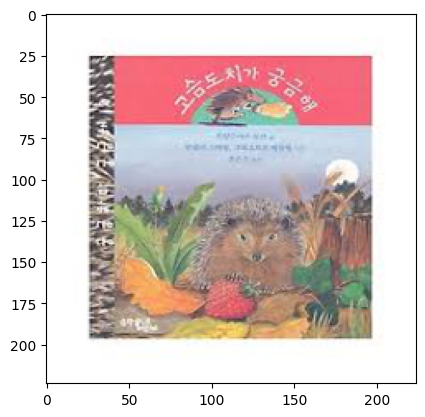

In [27]:
plt.imshow(X_train[1])

In [28]:
X_train[3]
# 가장 내부 배열은 R,G,B값에 따른 각각의 수치값들(세개의 수치로 하나의 픽셀의 색상을 최종결정)
# 그 다음 배열은 가로 한줄의 픽셀값
# 최종 배열은 이미지 전체의 픽셀들을 표

array([[[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 60,  20,  32],
        [ 67,  30,  38],
        [ 38,   5,   9]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 57,  23,  33],
        [ 64,  32,  38],
        [ 33,   5,   8]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 52,  26,  32],
        [ 57,  35,  37],
        [ 26,   6,   8]],

       ...,

       [[166, 145,  90],
        [167, 146,  91],
        [169, 148,  93],
        ...,
        [176, 147,  81],
        [173, 144,  76],
        [173, 144,  76]],

       [[164, 143,  88],
        [164, 143,  88],
        [166, 145,  90],
        ...,
        [176, 146,  80],
        [173, 144,  76],
        [173, 144,  76]],

       [[162, 141,  86],
        [162, 141,  86],
        [164, 143,  88],
        ...,
        [175, 146,  80],
        [173, 144,  76],
        [173, 144,  76]]

###색의 가산혼합
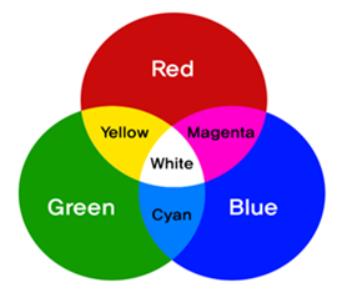

MLP로 분류

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [30]:
model = Sequential()

model.add(Flatten(input_shape =(224, 224, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [31]:
# sparse_categorical_crossentropy : 정답의 원핫 인코딩까지 같이 지원
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 22s 3s/step - loss: 5873.3853 - acc: 0.3385 - val_loss: 19841.9785 - val_acc: 0.3125
Epoch 2/100
6/6 [==============================] - 22s 3s/step - loss: 11470.0000 - acc: 0.3320 - val_loss: 8428.2188 - val_acc: 0.3073
Epoch 3/100
6/6 [==============================] - 14s 2s/step - loss: 11496.9561 - acc: 0.3451 - val_loss: 1631.6869 - val_acc: 0.3490
Epoch 4/100
6/6 [==============================] - 14s 2s/step - loss: 5499.6953 - acc: 0.3190 - val_loss: 6693.9844 - val_acc: 0.3646
Epoch 5/100
6/6 [==============================] - 14s 2s/step - loss: 6255.5684 - acc: 0.3451 - val_loss: 1099.5323 - val_acc: 0.3646
Epoch 6/100
6/6 [==============================] - 13s 2s/step - loss: 944.9837 - acc: 0.3607 - val_loss: 1125.2288 - val_acc: 0.3125
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 969.8320 - acc: 0.3294 - val_loss: 948.8582 - val_acc: 0.3229
Epoch 8/100
6/6 [==============================] - 14s 

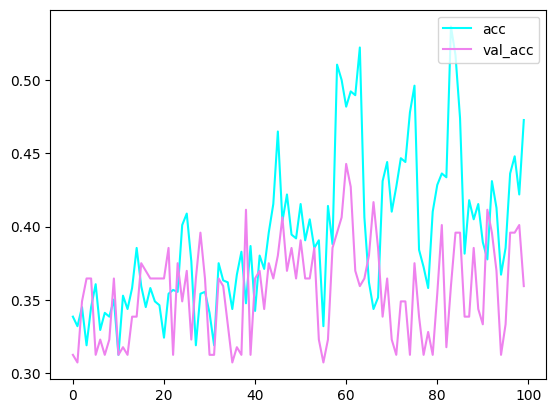

In [ ]:
plt.plot(h.history['acc'], label='acc',color='cyan')
plt.plot(h.history['val_acc'], label='val_acc',color='violet')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 정확도 외에 정밀도, 재현율, F!스코어 까지 확인
from sklearn.metrics import classification_report

In [ ]:
pre = model.predict(X_test)
pre

8/8 [==============================] - 1s 137ms/step


array([[1.93127114e-02, 1.46726086e-11, 9.80687380e-01],
       [2.69089006e-02, 7.61165120e-06, 9.73083377e-01],
       [9.99999940e-01, 2.67940323e-18, 1.50480503e-10],
       [1.09725058e-01, 8.90233338e-01, 4.15572067e-05],
       [9.99999940e-01, 7.85760109e-15, 5.72920877e-10],
       [1.14069302e-02, 9.87723410e-01, 8.69572570e-04],
       [9.91425633e-01, 2.25959598e-11, 8.57437216e-03],
       [2.91486457e-09, 9.99999940e-01, 2.03620125e-08],
       [1.44752264e-01, 8.55247557e-01, 8.55189057e-08],
       [1.24838422e-07, 9.99994695e-01, 5.12363749e-06],
       [9.98921573e-01, 6.98988224e-05, 1.00851897e-03],
       [2.62434536e-04, 9.44332898e-01, 5.54046407e-02],
       [0.00000000e+00, 9.99999940e-01, 3.81099285e-09],
       [3.87023658e-01, 4.49741405e-04, 6.12526536e-01],
       [9.99999940e-01, 2.30028760e-08, 7.65582805e-11],
       [9.99999940e-01, 7.07443052e-20, 4.65781358e-10],
       [5.64486509e-05, 1.81148989e-05, 9.99925315e-01],
       [9.99967158e-01, 1.47423

In [ ]:
# argmax : 가장 큰값의 인덱스를 변환해주는 함수
# axis=1 : 예측값이 2차원 배열이므로 열방향(좌->우)인 값들 중에서 비교하겠다는 뜻
np.argmax(pre, axis=1)

array([2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0])

In [ ]:
print(classification_report(y_test, np.argmax(pre,axis=1)))
# support : 데이터의 개수
# pre 값이 각 클래스에 대한 확률로 나오기 떄문에 그 중 가장 높은 값의 인덱스와 실제 정답을 비교하는 방식

              precision    recall  f1-score   support

           0       0.35      0.73      0.47        79
           1       0.40      0.24      0.30        80
           2       0.38      0.12      0.19        81

    accuracy                           0.36       240
   macro avg       0.38      0.37      0.32       240
weighted avg       0.38      0.36      0.32       240



기존 MLP로는 3채널의 컬러이면서 배경이 전부 다른 다양한 이미지들을 분류하는데 어려움이 있음

CNN 모델링

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
cnn_model = Sequential()

# 1. 특성추출부(Conv - 특징이 되는 정보를 추출)
# filters : 필터의 개수
# kernel_size: 필터의 크기
# padding = 'same' : 원본데이터의 크기에 맞춰 알아서 패딩을 적용 (valid: 패딩적용x)
cnn_model.add(Conv2D(input_shape=(224,224,3), filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# 2. 특성추출부(Pooling - 불필요한 정보를 삭제)
# pool_size : 디폴트 값은 (2x2)
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

# 3. MLP(분류기)
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

# cnn층 파라미터 수 계산
# 필터 크기(가로+세로+입력데이터의 채널수) + 필터개수 + 필터개수(b)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

In [ ]:
pre = cnn_model.predict(X_test)
print(classification_report(y_test, np.argmax(pre,axis=1)))

CNN 신경망이지만 직접 만든 모델로 한번에 좋은 결과를 얻기는 힘들다

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
pre_trained_model = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet')
# include_top= False : 불러온 사전학습모델의 MLP층을 사용하지않고 특성 추출부만 사용(=특성 추출방식)
# -> 기존 이미지넷 챌린지 대회는 1000가지의 이미지를 분류하는 대회였기 때문에 우리가 해결하고자 하는
#    3가지 이미지 분류와는 출력을 다르게 설정해줘야함
# weights= 'imagenet' : 이미지넷 챌린지 대회에서 학습된 가중치 w를 그대로 사용

In [ ]:
pre_trained_model.summary()

In [ ]:
cnn_model2 = Sequential()

cnn_model2.add(pre_trained_model)
# 사전학습 VGG16모델의 특성추출부에 우리 문제에 맞는 MLP층 추가
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(3, activation='softmax'))
cnn_model2.summary()

In [ ]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc'])

cnn_model2.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128)

- 결과는 일반 CNN 보다 조금 더 좋아졌지만 더 튜닝해보자!

In [ ]:
# 미세조정방식 (우리 데이터에 맞게 일부 충돌을 재학습 시키는 방식)
pre_trained_model2 = VGG16(input_shape = (224, 224, 3),
                           include_top = False,
                           weights = 'imagenet'
                           )

In [ ]:
# 불러온 VGG16 모델의 특성추출부의 층들의 명칭을 출력
for layer in pre_trained_model2.layers :
  print(layer.name)

In [ ]:
for layer in pre_trained_model2.layers:
  if layer.name == "block5_conv3":
    layer.trainable = True
  #나머지 층들은 학습이 불가능하도록 동결!
  else:
    layer.trainable = False

In [ ]:
cnn_model3 = Sequential()

cnn_model3.add(pre_trained_model2)
# 사전학습 VGG16모델의 특성추출부에 우리 문제에 맞는 MLP층 추가
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu'))
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(32, activation='relu'))
cnn_model3.add(Dense(3, activation='softmax'))
cnn_model3.summary()

In [ ]:
cnn_model3.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc'])

cnn_model3.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128)

### 데이터 증강
- 모델의 과대적합을 방지하기 위한 방법 중 하나로 훈련 데이터를 더 늘려주는 기법

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator : 이미지 데이터를 생성하기 위한 조건을 설정하는 함수

aug = ImageDataGenerator(rotation_range=30, # 이미지 회전 각도
                         width_shift_range=0.2, # 20% 내외 수평이동
                         height_shift_range=0.2, # 20% 내외 수직이동
                         zoom_range=0.2, # 0.8~1.2배로 축소&확대
                         horizontal_flip=True, # 수평방향으로 뒤집기
                         fill_mode="nearest" # 이미지가 변형되면서 비는 공간을 가장 근처의 픽셀로 채워줌
                         )

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
pre_trained_model3 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet')

for layer in pre_trained_model3.layers :
  if layer.name == "block5_conv3":
    layer.trainable = True
  else :
      layer.trainable = False

In [ ]:
cnn_model4 = Sequential()
cnn_model4.add(pre_trained_model3)
cnn_model4.add(Flatten())
cnn_model4.add(Dense(256, activation='relu'))
cnn_model4.add(Dense(128, activation='relu'))
cnn_model4.add(Dense(32, activation='relu'))
cnn_model4.add(Dense(3, activation='softmax'))

cnn_model4.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics=['acc']
                  )

In [ ]:
# flow : ImageDataGenerator로 설정한 조건을 통해 이미지를 실제로 생성하여 학습에 넣어주는 함수

cnn_model4.fit(aug.flow(X_train, y_train,
                        batch_size=128),
                        # 한 epoch당 미니배치가 7.5번 돌고 끝나게 됨
                        # (즉 1epoch에 128 * 7.5로 총 960장의 새로운 이미지 생성)
                        steps_per_epoch=len(X_train) / 128,
                        epochs=50
                        )

In [ ]:
pre = cnn_model4.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))